# Q1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('abtest.csv')
df

,Unnamed: 0,user_id,timestamp,group,landing_page,converted
0,0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...,...
290579,294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
290580,294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
290581,294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
290582,294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [3]:
df.groupby(['landing_page']).count()

,Unnamed: 0,user_id,timestamp,group,converted
landing_page,,,,,
new_page,145320,145320,145320,145320,145320
old_page,145264,145264,145264,145264,145264


In [4]:
df.groupby(['landing_page', 'converted']).count()

Unnamed: 0  user_id  timestamp   group
landing_page converted                                        
new_page     0              128064   128064     128064  128064
             1               17256    17256      17256   17256
old_page     0              127775   127775     127775  127775
             1               17489    17489      17489   17489

In [5]:
new_convert = 17256/145320
new_convert

0.11874483897605285

In [6]:
old_convert = 17489/145264
old_convert

0.12039459191540919

In [7]:
all_convert = (17256+17489)/(145264+145320)
all_convert

0.1195695564793657

In [8]:
# statsmodel provides a z-test method for users to conduct the test

import statsmodels.api as sm
n_new , n_old = 145320 , 145264
convert_old = df.query('landing_page == "old_page"')['converted'].sum()
convert_new = df.query('landing_page == "new_page"')['converted'].sum()
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new, n_old],alternative='larger')
(z_score, p_value)

(-1.3704617576931086, 0.9147285973840954)

In [9]:
import math

In [10]:
# You can also apply the formula in class slides 

z = (new_convert - old_convert)/math.sqrt(all_convert*(1-all_convert)*(1/145320+1/145264))
z

-1.3704617576931086

# Q2

In [11]:
de = pd.read_stata('demandIV.dta')
de.sample(15)

,c1,c2,e1,e2,praw,pcompete,income,price,q1,q2,quantity
28,-1.868625,2.440158,-3.363524,1.416527,4.675076,1.795920,4.141003,33.870560,10.065448,10.065448,10.065448
13,1.039922,0.084099,1.871860,2.672694,6.876556,3.715400,13.882836,35.885679,14.657283,14.657283,14.657283
4,0.631463,0.699119,1.136634,3.178241,8.273219,3.614275,8.051912,35.450698,12.657069,12.657069,12.657069
31,0.531111,1.466841,0.956000,4.782339,5.095099,11.111024,13.721429,38.190756,16.230054,16.230054,16.230054
11,-0.224612,0.208030,-0.404301,-0.034405,7.636818,9.352791,8.116127,34.995848,11.366009,11.366009,11.366009
35,-1.251146,-0.756358,-2.252062,-4.787980,6.172472,0.207647,9.570098,31.286931,8.762049,8.762049,8.762049
41,0.177278,0.758117,0.319100,2.240692,9.399579,7.077851,13.169622,38.217033,12.377932,12.377932,12.377932
40,0.506135,0.913162,0.911043,3.394165,0.383643,6.911477,3.375705,30.791051,16.018836,16.018836,16.018836
27,-0.347763,-0.561369,-0.625974,-2.173570,5.073822,3.443650,6.042404,30.759924,10.948622,10.948622,10.948622
22,-1.290516,0.163240,-2.322930,-2.674490,3.976995,1.708566,12.006320,32.707658,11.048153,11.048153,11.048153


In [12]:
# Specify your outcome variable and covariates 

q = de['quantity']
xd = de[['price', 'pcompete', 'income']]
xd = sm.add_constant(xd)
xd.head()

,const,price,pcompete,income
0,1.0,35.045719,2.550813,9.865897
1,1.0,31.152198,7.776625,7.113407
2,1.0,35.633009,10.752018,3.333738
3,1.0,34.160298,5.486875,12.529627
4,1.0,35.450698,3.614275,8.051912


In [13]:
demand = sm.OLS(q,xd)
results = demand.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               quantity   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.003
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.400
Time:                        15:54:44   Log-Likelihood:                -117.45
No. Observations:                  49   AIC:                             242.9
Df Residuals:                      45   BIC:                             250.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5633      5.019      1.507      0.139      -2.546      17.673
price          0.1186      0.172      0.691      0.493      -0.227       0.464
pcompete       0.0946      0.120      0.788      0.435      -0.147       0.336
income         0.0785      0.116      0.677      0.502      -0.155       0.312
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   2.366
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.328
Skew:                           0.381   Prob(JB):                        0.312
Kurtosis:                       2.251   Cond. No.                         435.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficient in price is positive but insignificant 

In [14]:
p = de['price']
xs = de[['quantity', 'praw']]
xs = sm.add_constant(xs)
xs.head()

,const,quantity,praw
0,1.0,11.447209,5.555645
1,1.0,13.572867,2.725446
2,1.0,13.858903,9.788842
3,1.0,10.266434,5.973904
4,1.0,12.657069,8.273219


In [15]:
supply = sm.OLS(p,xs)
results = supply.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     45.26
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           1.36e-11
Time:                        15:54:44   Log-Likelihood:                -94.248
No. Observations:                  49   AIC:                             194.5
Df Residuals:                      46   BIC:                             200.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0717      1.573     12.764      0.000      16.906      23.237
quantity       0.6726      0.102      6.614      0.000       0.468       0.877
praw           0.8754      0.095      9.190      0.000       0.684       1.067
==============================================================================
Omnibus:                        6.118   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                2.472
Skew:                           0.199   Prob(JB):                        0.291
Kurtosis:                       1.974   Cond. No.                         88.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## IV 2sls for demand and supply equations

In [16]:
from linearmodels.iv import IV2SLS

In [17]:
demand_IV = IV2SLS(q, xd[['const', 'pcompete', 'income']], xd['price'], xs['praw']).fit(cov_type='robust')
print(demand_IV)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               quantity   R-squared:                     -0.8477
Estimator:                    IV-2SLS   Adj. R-squared:                -0.9709
No. Observations:                  49   F-statistic:                    7.5722
Date:                Tue, Apr 07 2020   P-value (F-stat)                0.0557
Time:                        15:54:44   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          39.900     11.582     3.4451     0.0006      17.200      62.599
pcompete       0.3320     0.1887     1.7591     0.07

In [18]:
supply_IV = IV2SLS(p, xs[['const', 'praw']], xs['quantity'], xd[['pcompete', 'income']]).fit(cov_type='robust')
print(supply_IV)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  price   R-squared:                     -0.0150
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0592
No. Observations:                  49   F-statistic:                    30.992
Date:                Tue, Apr 07 2020   P-value (F-stat)                0.0000
Time:                        15:54:44   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          5.6157     7.0537     0.7961     0.4260     -8.2093      19.441
praw           1.3204     0.2450     5.3894     0.00

# Q3

In [19]:
import numpy as np

In [20]:
otc = pd.read_stata('otc.dta')
otc.head()

,store,week,brand,sales_,count,price_,prom_,cost_,tot_sales,avg_price,...,brand2,brand3,brand4,brand5,brand6,brand7,brand8,brand9,brand10,brand11
0,2,1,1,16,14181,3.29,0.0,2.06,84.0,3.301250,...,0,0,0,0,0,0,0,0,0,0
1,116,1,1,9,15246,3.23,0.0,1.99,82.0,3.302083,...,0,0,0,0,0,0,0,0,0,0
2,12,1,1,22,27267,3.33,0.0,2.11,129.0,3.300694,...,0,0,0,0,0,0,0,0,0,0
3,77,1,1,14,16474,3.29,0.0,2.06,94.0,3.301250,...,0,0,0,0,0,0,0,0,0,0
4,54,1,1,15,14636,3.33,0.0,2.11,89.0,3.300694,...,0,0,0,0,0,0,0,0,0,0


In [21]:
otc['tot_sales'] = otc.groupby(['store', 'week'])['sales_'].transform('sum')
otc['sj'] = otc['sales_'] / otc['count']
otc['s0'] = (otc['count'] - otc['tot_sales']) / otc['count']

In [22]:
otc['delta'] = np.log(otc['sj']/otc['s0'])
otc = sm.add_constant(otc)
otc

,const,store,week,brand,sales_,count,price_,prom_,cost_,tot_sales,...,brand5,brand6,brand7,brand8,brand9,brand10,brand11,sj,s0,delta
0,1.0,2,1,1,16,14181,3.29,0.00,2.06,84,...,0,0,0,0,0,0,0,0.001128,0.994077,-6.781129
1,1.0,116,1,1,9,15246,3.23,0.00,1.99,82,...,0,0,0,0,0,0,0,0.000590,0.994622,-7.429455
2,1.0,12,1,1,22,27267,3.33,0.00,2.11,129,...,0,0,0,0,0,0,0,0.000807,0.995269,-7.117648
3,1.0,77,1,1,14,16474,3.29,0.00,2.06,94,...,0,0,0,0,0,0,0,0.000850,0.994294,-7.064759
4,1.0,54,1,1,15,14636,3.33,0.00,2.11,89,...,0,0,0,0,0,0,0,0.001025,0.993919,-6.877090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38539,1.0,86,48,11,10,22951,4.09,0.30,1.82,123,...,0,0,0,0,0,0,1,0.000436,0.994641,-7.733158
38540,1.0,49,48,11,4,12016,4.19,0.50,1.89,56,...,0,0,0,0,0,0,1,0.000333,0.995340,-8.003029
38541,1.0,103,48,11,32,23546,3.77,0.09,1.60,172,...,0,0,0,0,0,0,1,0.001359,0.992695,-6.593644
38542,1.0,102,48,11,20,32848,4.08,0.00,1.81,198,...,0,0,0,0,0,0,1,0.000609,0.993972,-7.397868


In [23]:
ols_demand = IV2SLS(otc['delta'], otc[['const', 'price_', 'prom_']], None, None).fit(cov_type='robust')
print(ols_demand)

                            OLS Estimation Summary                            
Dep. Variable:                  delta   R-squared:                      0.0161
Estimator:                        OLS   Adj. R-squared:                 0.0160
No. Observations:               38544   F-statistic:                    619.55
Date:                Tue, Apr 07 2020   P-value (F-stat)                0.0000
Time:                        15:54:45   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const         -7.7664     0.0124    -626.01     0.0000     -7.7907     -7.7420
price_        -0.0514     0.0026    -19.860     0.00

In [24]:
otc['ela_ols'] = -0.0514*otc['price_']*(1-otc['sj'])

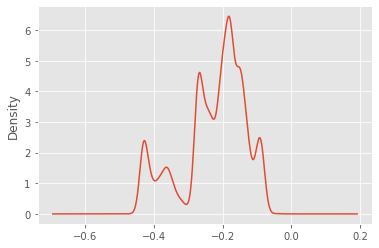

In [25]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
otc['ela_ols'].plot(kind='kde')

In [26]:
otc.groupby(['brand'])['ela_ols'].mean()

brand
1    -0.175677
2    -0.253782
3    -0.360403
4    -0.152235
5    -0.264345
6    -0.419330
7    -0.137365
8    -0.185376
9    -0.203798
10   -0.099075
11   -0.228499
Name: ela_ols, dtype: float64

### The price elasticities are all bigger than -1, which mean that those stores are not maximizing profits. This is unlikely to be true. 

## Adding Brand Dummies could help. 

In [27]:
iv_demand = IV2SLS(otc['delta'], otc[['const', 'prom_', 'brand1', 'brand2', 'brand3', 'brand4', 'brand5', 'brand6', 'brand7', 'brand8', 'brand9', 'brand10']], otc['price_'], otc[['avg_price']]).fit(cov_type='robust')
print(iv_demand)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                  delta   R-squared:                      0.4540
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4539
No. Observations:               38544   F-statistic:                 4.204e+04
Date:                Tue, Apr 07 2020   P-value (F-stat)                0.0000
Time:                        15:54:46   Distribution:                 chi2(12)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const         -5.9396     0.0698    -85.086     0.0000     -6.0764     -5.8027
prom_          0.2670     0.0143     18.706     0.00

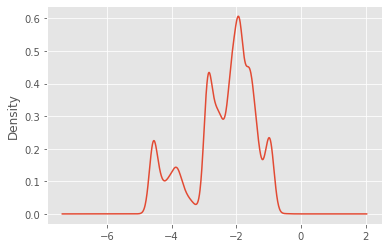

In [28]:
otc['ela_dummy'] = -0.5468*otc['price_']*(1-otc['sj'])
otc['ela_dummy'].plot(kind='kde')

In [29]:
otc.groupby(['brand'])['ela_dummy'].mean()

brand
1    -1.868875
2    -2.699763
3    -3.834010
4    -1.619497
5    -2.812137
6    -4.460890
7    -1.461306
8    -1.972057
9    -2.168033
10   -1.053974
11   -2.430799
Name: ela_dummy, dtype: float64